<a href="https://colab.research.google.com/github/berkleysayaka/Data201test1/blob/main/Sayaka_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
 import csv
import pprint

In [9]:
 from google.colab import files
uploaded = files.upload()

Saving Project 1 Housing.csv to Project 1 Housing.csv


In [12]:
import io
import pandas as pd

housing_df = pd.read_csv(io.BytesIO(uploaded["Project 1 Housing.csv"]))

In [19]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns


Member: Nancy, Chisom, Jerome, Justin, Sayaka

This dataset was downloaded from Kaggle.com. The data were obtained by Klenn Dungaran by scraping data from the https://www.lamudi.com.ph/ website. Lamudi is an international firm operating in the Philippines, Indonesia, and Mexico. Lamudi maintains an online platform containing real estate data on a wide variety of properties. The platform enables buyers, sellers, real estate professionals, and members of the public to connect with each other and post and find properties of interest.

The dataset was posted on 20 March 2024. The dataset consists of 1,500 property records. Information on the site indicates the dataset will be updated annually. It is not possible to determine whether the data are for all areas in the Philippines or only certain geographical areas. The dataset contains records on single-family homes, townhomes, and (it appears) vacant lots. The type of property is not coded; the properties are described with a freeform textual description.

There are nine variables in the dataset: description, location, price (in Philippine pesos), number of bedrooms, number of bathrooms, floor area, lot area, latitude, and longitude. Forty-nine records had missing price data; 37 records had missing floor area. It is assumed the records with missing floor area were lots with no houses. To clean the data, the observations with missing data were deleted, leaving 1,416 records for analysis. All 1,416 records had floor area, so presumably they are all dwelling units, either single-family homes or townhomes.

The following research questions guided our analysis:

· what is the range of prices of residential dwelling unit? (histogram)

· what is the relationship between floor area and price? (scatterplot)

· what is the correlation between the number of bedrooms and the number of bathrooms? (correlation)

· what is the median price of the residential units? (median)

The research questions will be answered by examining a subset of the file drawn randomly from the larger dataset.

# New Section

Review Data

Clean dataset by changing headers to lower case and removing NAs, blanks

In [13]:
drop_na_housing_df = housing_df.dropna()
drop_na_housing_df.columns = drop_na_housing_df.columns.str.lower()
drop_na_housing_df.head()

,description,location,price,bedrooms,bathrooms,floor_area,land_area,latitude,longitude
0,Preselling 2-Storey Townhouses in Village East...,"Santo Domingo, Cainta",9500000.0,4.0,3.0,144.00,136.0,14.582341,121.118044
1,Affordable House & Lot with Complete Amenities...,"San Vicente, Santa Maria",4400000.0,3.0,2.0,63.20,80.0,14.807715,121.002402
4,Futura Homes Zamboanga | Amber 2BR Townhouse E...,"Zambowood Rd. Boalan, Zamboanga",3275000.0,2.0,1.0,40.32,78.4,6.948389,122.114889
7,"5BR 2-Storey House and Lot for Sale in Subic, ...","Aningway Sacatihan, Subic",8428000.0,5.0,3.0,142.00,121.0,14.913178,120.228242
9,3BR 3-Storey Townhouse for Sale near Alabang i...,"Km. 19 West Service Rd. Cupang, Muntinlupa",28650000.0,3.0,3.0,219.30,90.0,14.427001,121.045278


Descriptive Statistics for Prices in Pesos

In [15]:
drop_na_housing_df['price'].describe()

count    1.055000e+03
mean     3.532304e+07
std      8.707897e+07
min      8.690000e+05
25%      5.453500e+06
50%      1.050000e+07
75%      2.708800e+07
max      1.200000e+09
Name: price, dtype: float64

Convert the Price column values from pesos to USD.

In [16]:
drop_na_housing_df['price']=drop_na_housing_df['price'].apply(lambda x : x*0.018)

<ipython-input-16-f4635965c98a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_na_housing_df['price']=drop_na_housing_df['price'].apply(lambda x : x*0.018)


In [ ]:
drop_na_houses_df = houses_df.dropna()
drop_na_houses_df.head()

,Description,Location,Price,Bedrooms,Bathrooms,Floor_Area,Land_Area,Latitude,Longitude
0,Preselling 2-Storey Townhouses in Village East...,"Santo Domingo, Cainta",9500000.0,4.0,3.0,144.00,136.0,14.582341,121.118044
1,Affordable House & Lot with Complete Amenities...,"San Vicente, Santa Maria",4400000.0,3.0,2.0,63.20,80.0,14.807715,121.002402
4,Futura Homes Zamboanga | Amber 2BR Townhouse E...,"Zambowood Rd. Boalan, Zamboanga",3275000.0,2.0,1.0,40.32,78.4,6.948389,122.114889
7,"5BR 2-Storey House and Lot for Sale in Subic, ...","Aningway Sacatihan, Subic",8428000.0,5.0,3.0,142.00,121.0,14.913178,120.228242
9,3BR 3-Storey Townhouse for Sale near Alabang i...,"Km. 19 West Service Rd. Cupang, Muntinlupa",28650000.0,3.0,3.0,219.30,90.0,14.427001,121.045278


In [17]:
drop_na_housing_df['price'].describe()

count    1.055000e+03
mean     6.358147e+05
std      1.567422e+06
min      1.564200e+04
25%      9.816300e+04
50%      1.890000e+05
75%      4.875840e+05
max      2.160000e+07
Name: price, dtype: float64

Histogram of Real Estate Prices

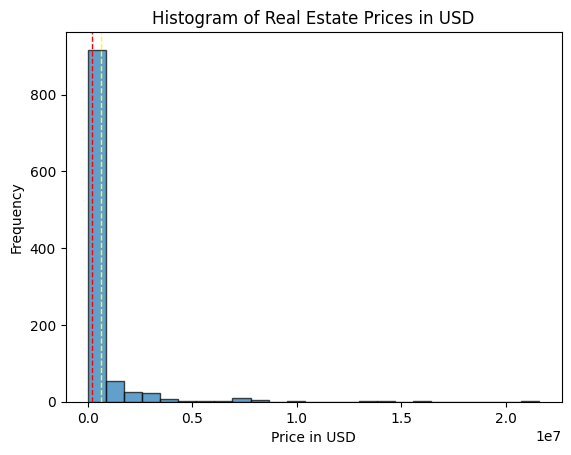

In [20]:
drop_na_housing_df["price"].plot.hist(bins=25, edgecolor = "k", alpha=0.7)
plt.title("Histogram of Real Estate Prices in USD")
plt.axvline(drop_na_housing_df["price"].mean(), color = "yellow", linestyle = "dashed", linewidth = 1)
plt.axvline(drop_na_housing_df['price'].median(), color = 'red', linestyle = "dashed", linewidth = 1)
plt.xlabel("Price in USD")
plt.show()

Load csv file from local computer.

Scatter Plot of Floor Area as a Predictor of Price

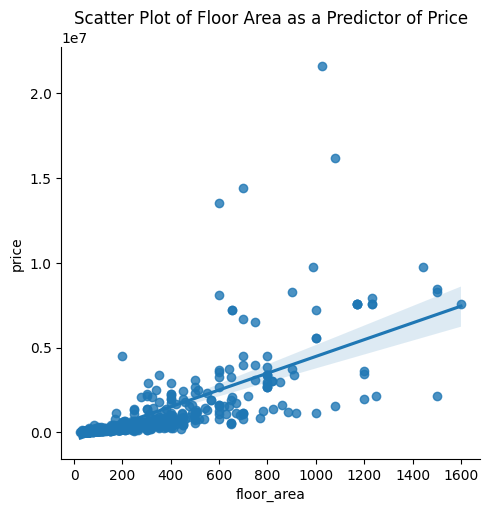

In [35]:
import matplotlib.pyplot as plt
sns.lmplot(x="floor_area", y="price", data=drop_na_housing_df)
plt.title("Scatter Plot of Floor Area as a Predictor of Price")
plt.show()


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
corr = drop_na_housing_df['price'].corr(drop_na_housing_df['floor_area'])

# Print the correlation coefficient
print('Correlation coefficient:', corr)



Correlation coefficient: 0.7275725027984233


There appears to be a positive correlation prices increase with increase in floor area

<ipython-input-40-3e641dc3299a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_na_housing_df['Price_USD'] = drop_na_housing_df['price'] #create new df "Price_USD"


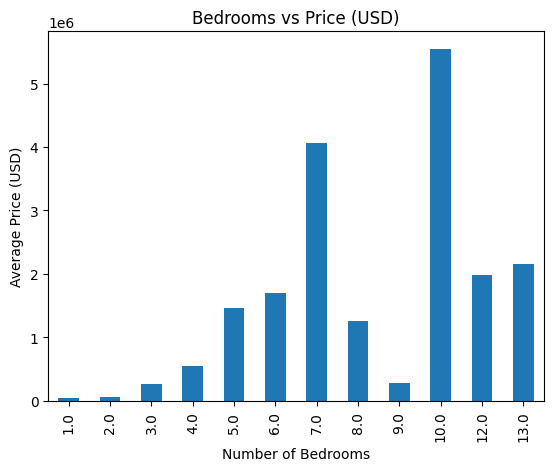

In [40]:
import matplotlib.pyplot as plt
exchange_rate = 0.018
drop_na_housing_df['Price_USD'] = drop_na_housing_df['price'] #create new df "Price_USD"

# create plot
drop_na_housing_df.groupby('bedrooms')['Price_USD'].mean().plot(kind='bar')

# Set title, labels, and display the plot
plt.title('Bedrooms vs Price (USD)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (USD)')
plt.show()

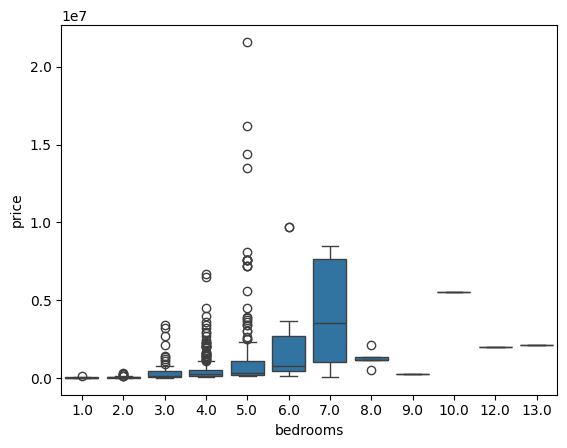

In [41]:
import seaborn as sns
sns.boxplot(x="bedrooms", y="price", showfliers = True, data=drop_na_housing_df)  # Replace 'housing' with your DataFrame name
plt.show()

Additional Correlations

In [42]:
drop_na_housing_df['price'].corr(drop_na_housing_df['bathrooms'])

0.35784803574145146

In [43]:
drop_na_housing_df['price'].corr(drop_na_housing_df['bedrooms'])

0.3707567629554745

In [44]:
original_sample = drop_na_housing_df['price'].sample(frac=0.1, replace = True, random_state=123)

Bootstrapping for median_boot_samples

In [45]:
median_boot_samples =[]
for i in range(1000):
  boot_sample = np.random.choice(original_sample, 100)
  median_boot_samples.append(np.median(boot_sample))
np.mean(median_boot_samples)

179231.259132

Creating Confidence Intervals from the Bootstrapping Samples

In [46]:
conf_int = np.percentile(median_boot_samples, [2.5, 97.5])
conf_int

array([140760., 288000.])

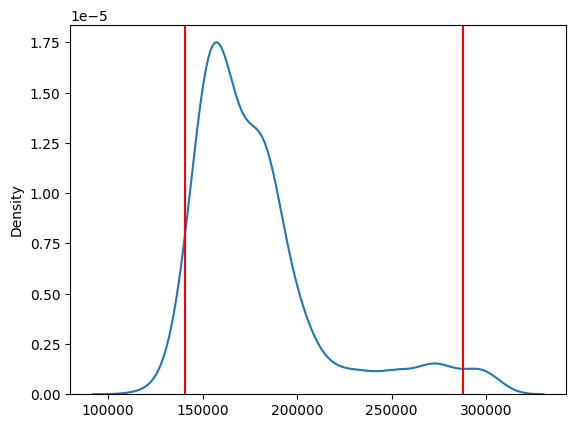

In [47]:
import seaborn as sns
sns.kdeplot(median_boot_samples)
for endpoint in conf_int:
  plt.axvline(endpoint, color = 'red')

Bellow Sayaka's script sample code

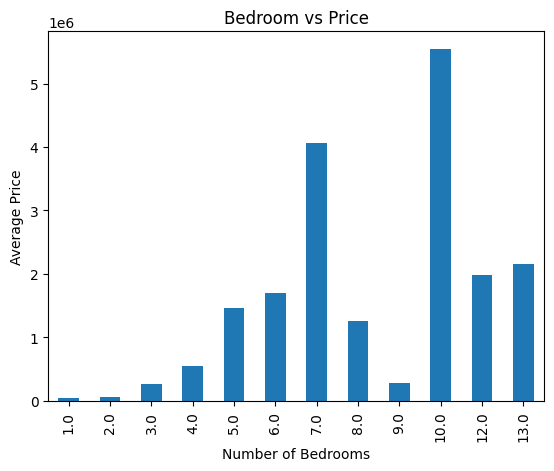

In [52]:
import matplotlib.pyplot as plt
drop_na_housing_df.groupby('bedrooms')['price'].mean().plot.bar()
plt.title('Bedroom vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


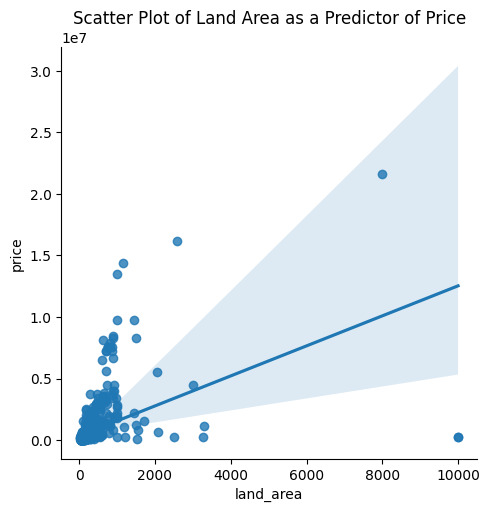

In [56]:
import matplotlib.pyplot as plt
sns.lmplot(x="land_area", y="price", data=drop_na_housing_df)
plt.title("Scatter Plot of Land Area as a Predictor of Price")
plt.show()
